In [318]:
#Machine Learning
!pip -q install plotly --upgrade
!pip -q install yellowbrick

In [319]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [320]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [321]:
base_credito = pd.read_csv('/content/drive/MyDrive/Bases de dados-20230224T225515Z-001/Bases de dados/credit_data.csv')

In [322]:
base_credito.shape

(2000, 5)

In [323]:
base_credito.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [324]:
base_credito.tail()

,clientid,income,age,loan,default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [325]:
base_credito.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [326]:
base_credito[base_credito['income'] >=41.317159]

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [327]:
np.unique(base_credito['default'], return_counts = True)

(array([0, 1]), array([1717,  283]))

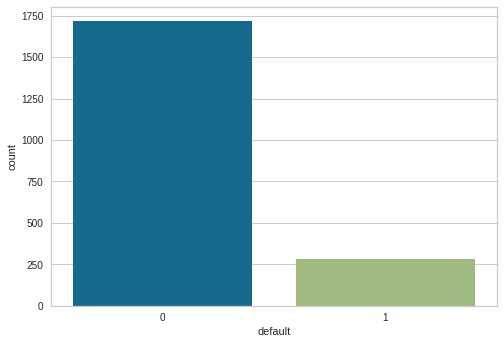

In [328]:
sns.countplot(x=base_credito['default']);

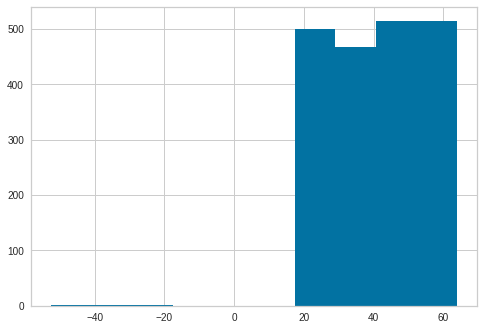

In [329]:
plt.hist(x = base_credito['age']);

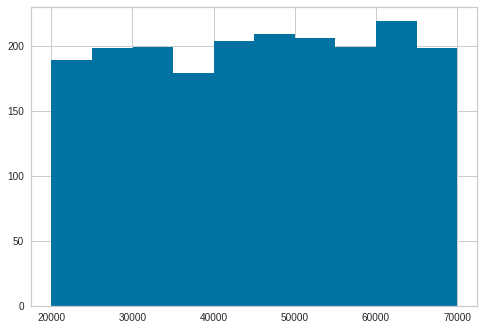

In [330]:
plt.hist( x= base_credito['income']);

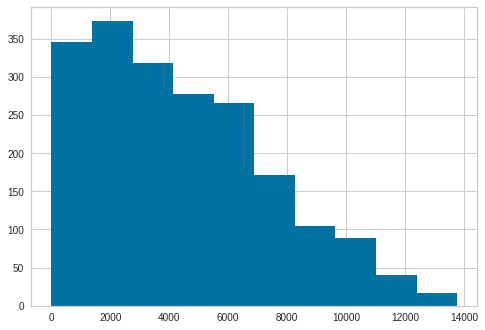

In [331]:
plt.hist( x= base_credito['loan']);

In [332]:
grafico  = px.scatter_matrix(base_credito, dimensions = ['age','income','loan'], color='default')
grafico.show()

In [333]:
base_credito.loc[base_credito['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [334]:
#Apagar somente os registros menores que zero
base_credito2 = base_credito.drop(base_credito[base_credito['age']<0].index)

In [335]:
base_credito2.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999],
           dtype='int64', length=1997)

In [336]:
base_credito2.loc[base_credito2['age']<0]

,clientid,income,age,loan,default


In [337]:
#Preencher os valores vazios
base_credito['age'][base_credito['age']>0].mean()

40.92770044906149

In [338]:
base_credito.loc[base_credito['age']<0, 'age'] = base_credito['age'][base_credito['age']>0].mean()

In [339]:
base_credito.loc[base_credito['age']<0] 

,clientid,income,age,loan,default


(array([202., 207., 196., 209., 170., 210., 202., 217., 196., 188.]),
 array([18.05518851, 22.64684924, 27.23850998, 31.83017071, 36.42183144,
        41.01349218, 45.60515291, 50.19681364, 54.78847438, 59.38013511,
        63.97179584]),
 <BarContainer object of 10 artists>)

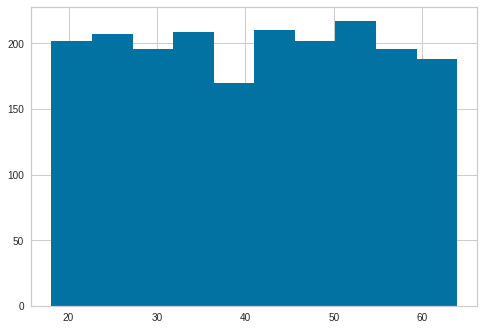

In [340]:
plt.hist(x= base_credito['age'])

In [341]:
base_credito.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [342]:
base_credito.loc[pd.isnull(base_credito['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [343]:
base_credito['age'].fillna(base_credito['age'][base_credito['age']>0].mean(),inplace=True)

In [344]:
base_credito.loc[pd.isnull(base_credito['age'])]

,clientid,income,age,loan,default


In [345]:
base_credito.loc[base_credito['clientid'].isin([29,31,32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.9277,2082.625938,0
30,31,48528.852796,40.9277,6155.784670,0
31,32,23526.302555,40.9277,2862.010139,0


In [346]:
#Previsores e Class
X_credit = base_credito[['income','age','loan']].values

In [347]:
type(X_credit)

numpy.ndarray

In [348]:
y_credit = base_credito[['default']].values

In [349]:
X_credit[:, 0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [350]:
X_credit[:,0].max(), X_credit[:,1].min(),X_credit[:,2].max()

(69995.6855783239, 18.055188510566897, 13766.0512393337)

In [351]:
from sklearn.preprocessing import StandardScaler
scaler_credt = StandardScaler()

In [352]:
X_credit = scaler_credt.fit_transform(X_credit)

In [353]:
base_census = pd.read_csv('/content/drive/MyDrive/Bases de dados-20230224T225515Z-001/Bases de dados/census.csv')

In [354]:
base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [355]:
base_census.shape

(32561, 15)

In [356]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [357]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [358]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

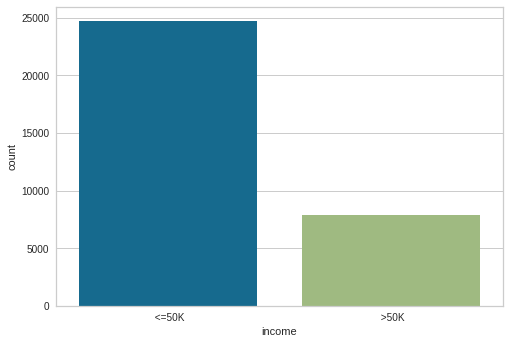

In [359]:
sns.countplot(x= base_census['income']);

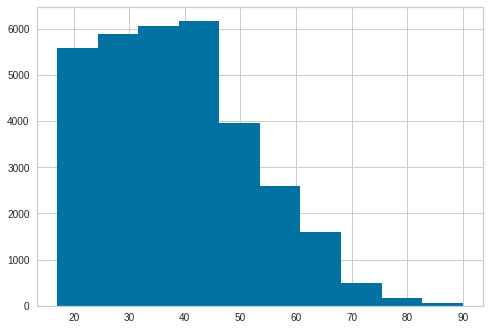

In [360]:
plt.hist(x=base_census['age']);

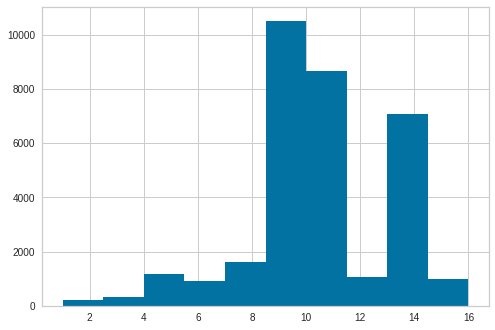

In [361]:
plt.hist(x=base_census['education-num']);

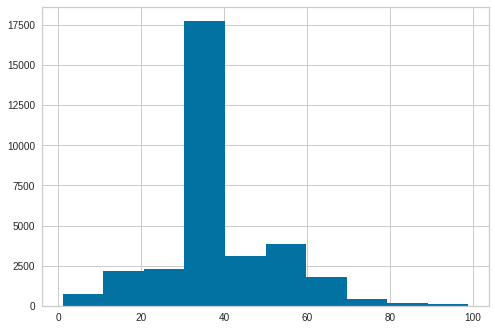

In [362]:
plt.hist(x=base_census['hour-per-week']);

In [363]:
grafico = px.treemap(base_census, path = ['workclass', 'age'])
grafico

In [364]:
grafico = px.treemap(base_census, path = ['occupation', 'relationship','age'])
grafico

In [365]:
grafico = px.parallel_categories(base_census,dimensions=['occupation', 'relationship'] )
grafico.show()

In [366]:
grafico = px.parallel_categories(base_census,dimensions=['education', 'income'] )
grafico.show()

In [367]:
#divisão entre previsores e classe
X_census = base_census.iloc[:,0:14].values

In [368]:
y_census = base_census.iloc[:,14].values

#Tratando categoricos

##Label Enconder

In [369]:
from sklearn.preprocessing import LabelEncoder
label_encoder_teste = LabelEncoder()

In [370]:
teste = label_encoder_teste.fit_transform(X_census[:,1])

In [371]:
teste

array([7, 6, 4, ..., 4, 4, 5])

In [372]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [373]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

##OnehotEncoder

In [374]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

In [375]:
onehotenconde_censu = ColumnTransformer(transformers=[('Onehot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [376]:
X_census = onehotenconde_censu.fit_transform(X_census).toarray()

In [377]:
X_census.shape

(32561, 108)

##Escalonamento dos valores, para padronizar

##Base de crédito

In [378]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler() 
X_census = scaler_census.fit_transform(X_census)

In [379]:
from sklearn.model_selection import train_test_split

In [380]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento,y_credit_teste = train_test_split(X_credit, y_credit, test_size =0.25, random_state=0)

In [381]:
X_credit_treinamento.shape

(1500, 3)

##base Census

In [382]:
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census,y_census,test_size=0.15, random_state=0)

In [383]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [384]:
import pickle

In [385]:
with open( 'credit.pkl', mode ='wb') as f:
  pickle.dump([X_credit_treinamento,y_credit_treinamento,X_credit_teste,y_credit_teste],f)

In [386]:
with open( 'census.pkl', mode ='wb') as f:
  pickle.dump([X_census_treinamento,y_census_treinamento,X_census_teste,y_census_teste],f)

#Naive Bayes

In [387]:
from sklearn.naive_bayes import GaussianNB

In [388]:
#Abordagem probabilistica 
#filtros de spam
#Mineração de emoções
#Separação de documentos
# Analisar os dados, e gerar uma tabela de probabilidades 
#Correção Laplaciana
#Pega raio, probabilidades apriori
#rapido, simplicidade de interpretação, trabalha com altas dimeensões
#Boas previsões em bases pequenas
#Atributos independentes é desvantagem, sem sempre é verdade

In [389]:
base_risco_credito = pd.read_csv('/content/drive/MyDrive/Bases de dados-20230224T225515Z-001/Bases de dados/risco_credito.csv')

In [390]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [391]:
X_risco_credito = base_risco_credito.iloc[:,0:4].values

In [392]:
y_risco_credito = base_risco_credito.iloc[:, 4].values

In [393]:
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [394]:
X_risco_credito[:,0] = label_encoder_historia.fit_transform(X_risco_credito[:,0] )
X_risco_credito[:,1] = label_encoder_divida.fit_transform(X_risco_credito[:,1] )
X_risco_credito[:,2] = label_encoder_garantia.fit_transform(X_risco_credito[:,2] )
X_risco_credito[:,3] = label_encoder_renda.fit_transform(X_risco_credito[:,3] )

In [395]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [396]:
with open ('risco_credito.pkl','wb') as f:
  pickle.dump([X_risco_credito, y_risco_credito],f)

In [397]:
naive_risco_credito = GaussianNB()

In [398]:
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [399]:
previsao = naive_risco_credito.predict([[0,0,1,2],[2,0,0,0]])

In [400]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [401]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [402]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [403]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

###Naive Baeys Base Crédito

In [404]:
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento,y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [405]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treinamento,y_credit_treinamento)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GaussianNB()

In [406]:
previsoes = naive_credit_data.predict(X_credit_teste)

In [407]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [408]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [409]:
accuracy_score(y_credit_teste, previsoes)

0.938

In [410]:
confusion_matrix(y_credit_teste, previsoes)

array([[428,   8],
       [ 23,  41]])

In [411]:
from yellowbrick.classifier import ConfusionMatrix

0.938

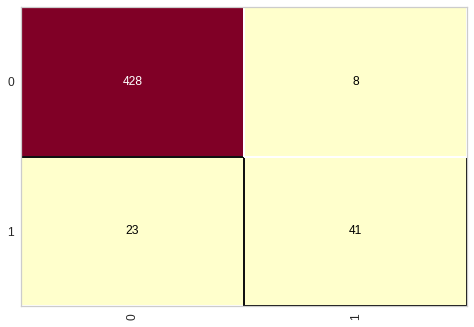

In [412]:
cm = ConfusionMatrix(naive_credit_data) #Analisa de uma forma mais dinâmica
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)
# Repare que 23 foram classificadso como que pagam emprestimos porém não pagam

In [413]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



In [414]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento,y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [415]:
X_census_treinamento.shape

(27676, 108)

In [416]:
y_census_treinamento = y_census_treinamento.ravel()

In [417]:
X_census_treinamento.shape

(27676, 108)

In [418]:
naive_census = GaussianNB()
naive_census.fit(X_census_treinamento,y_census_treinamento)
previsoes = naive_census.predict(X_census_teste)

In [419]:
accuracy_score(y_census_teste,previsoes) # Não executar o escalonamento

0.4767656090071648

0.4767656090071648

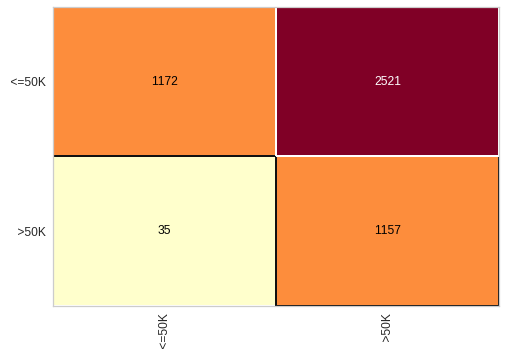

In [420]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento,y_census_treinamento)
cm.score(X_census_teste,y_census_teste)

In [421]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

